<a href="https://colab.research.google.com/github/sarasemsem/Data/blob/main/Mini_Projet_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers.

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/online_retail.csv')

Mounted at /content/drive


# Nouvelle section

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [3]:
# Visualize the first 5
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# afficher les statistiques pour les statestiques numériques
display(data.describe())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
## afficher les statistiques pour les données catégorielles
display(data.describe(exclude='number'))

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/11 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [7]:
#Vérifier les défauts du produit
#Vérifiez les lignes avec des valeurs manquantes avec #isnull()
data[data["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


In [8]:
#Verify CustormerID ID client
#Vérifiez les lignes avec des valeurs manquantes avec #isnull()
data[data.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom


In [9]:
#Supprimer les lignes avec #Description et CustomerID manquants
#Spécification de colonne avec #loc
#isnull()==Faux
data = data.loc[(data.CustomerID.isnull()==False) & (data.Description.isnull()==False)].copy()

In [10]:
# Vérification de la valeur manquante
data.isnull().sum().sum()

0

In [35]:
##Convertir la colonne InvoiceDate en type de date
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
#Créer une colonne #Month pour extraire les informations du mois
data["Month"] = data["InvoiceDate"].dt.month

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,total_transaction,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2010,Dec11
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2010,Dec11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11


In [24]:
#adding a column total_transaction to define total transaction for purchasetion
data['total_transaction']=data['Quantity']*data['UnitPrice']

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,total_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [25]:
data['Month']=data['InvoiceDate'].apply(lambda x:x.month)

In [26]:
data['Year']=data['InvoiceDate'].apply(lambda x:x.year)

In [27]:
data=data.sort_values(by=['Year','Month'])

In [28]:
mmap={1:'Jan11',2:'Feb11',3:'Mar11',4:'Apr11', 5:'May11', 6:'Jun11', 7:'Jul11',8:'Aug11',9:'Sep11',10:'Oct11',11:'Nov11',12:'Dec11'}

In [31]:
data['Month_name']=data['Month'].map(mmap)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,total_transaction,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2010,Dec11
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2010,Dec11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2010,Dec11


In [34]:
monthly=data.groupby(['Year','Month','Month_name']).sum()
monthly

<ipython-input-34-6c8d012d7acb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly=data.groupby(['Year','Month','Month_name']).sum()


Quantity   UnitPrice    CustomerID  total_transaction
Year Month Month_name                                                       
2010 12    Dec11         296362   86057.190  4.166977e+08         554604.020
2011 1     Jan11         269379   73202.320  3.319198e+08         475074.380
     2     Feb11         262833   67529.430  3.117809e+08         436546.150
     3     Mar11         344012   96183.240  4.223298e+08         579964.610
     4     Apr11         278585   91117.721  3.541194e+08         426047.851
     5     May11         367852  125537.660  4.400088e+08         648251.080
     6     Jun11         356922  129301.450  4.264710e+08         608013.160
     7     Jul11         363418   92754.521  4.209226e+08         574238.481
     8     Aug11         386612   88126.750  4.219478e+08         616368.000
     9     Sep11         537496  126029.422  6.229373e+08         931440.372
     10    Oct11         569666  186583.000  7.727017e+08         974603.590
     11    Nov11         669915  195298.520  1.007384e+09        1132407.740
     12    Dec11         203836   50098.740  2.702551e+08         342506.380

In [38]:
monthly.reset_index(inplace=True)
monthly


,index,Year,Month,Month_name,Quantity,UnitPrice,CustomerID,total_transaction
0,0,2010,12,Dec11,296362,86057.190,4.166977e+08,554604.020
1,1,2011,1,Jan11,269379,73202.320,3.319198e+08,475074.380
2,2,2011,2,Feb11,262833,67529.430,3.117809e+08,436546.150
3,3,2011,3,Mar11,344012,96183.240,4.223298e+08,579964.610
4,4,2011,4,Apr11,278585,91117.721,3.541194e+08,426047.851
5,5,2011,5,May11,367852,125537.660,4.400088e+08,648251.080
6,6,2011,6,Jun11,356922,129301.450,4.264710e+08,608013.160
7,7,2011,7,Jul11,363418,92754.521,4.209226e+08,574238.481
8,8,2011,8,Aug11,386612,88126.750,4.219478e+08,616368.000
9,9,2011,9,Sep11,537496,126029.422,6.229373e+08,931440.372


Text(0, 0.5, 'Total Transaction (mil)')

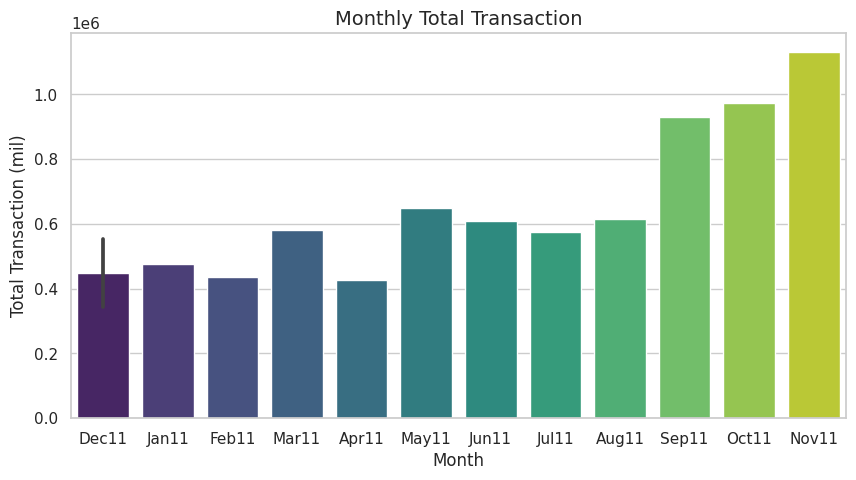

In [39]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Month_name', y='total_transaction', data=monthly, palette='viridis')
plt.title('Monthly Total Transaction', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Transaction (mil)')

Month with highest transaction = November 2011 Month with lowest transaction = December 2011

In [40]:
#Figuring out what products are sold the most in November 2011 in terms of total transaction
nov11=data[(data['Month']==11) & (data['Year']==2011)]
nov11.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65598 entries, 431673 to 516383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          65598 non-null  object        
 1   StockCode          65598 non-null  object        
 2   Description        65598 non-null  object        
 3   Quantity           65598 non-null  int64         
 4   InvoiceDate        65598 non-null  datetime64[ns]
 5   UnitPrice          65598 non-null  float64       
 6   CustomerID         65598 non-null  float64       
 7   Country            65598 non-null  object        
 8   Month              65598 non-null  int64         
 9   total_transaction  65598 non-null  float64       
 10  Year               65598 non-null  int64         
 11  Month_name         65598 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 6.5+ MB


In [42]:
#Filling the missing values in Description column with 'unknown' so that the length matches the StockCode column

nov11['Description'].fillna('unknown', inplace=True)
nov11.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65598 entries, 431673 to 516383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          65598 non-null  object        
 1   StockCode          65598 non-null  object        
 2   Description        65598 non-null  object        
 3   Quantity           65598 non-null  int64         
 4   InvoiceDate        65598 non-null  datetime64[ns]
 5   UnitPrice          65598 non-null  float64       
 6   CustomerID         65598 non-null  float64       
 7   Country            65598 non-null  object        
 8   Month              65598 non-null  int64         
 9   total_transaction  65598 non-null  float64       
 10  Year               65598 non-null  int64         
 11  Month_name         65598 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 6.5+ MB


<ipython-input-42-1f3ea4159394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov11['Description'].fillna('unknown', inplace=True)


In [44]:
#Groupby StockCode and Description, and sort it by total transaction to know what products generate the most transactions

nov11=nov11.groupby(['StockCode','Description']).sum().sort_values(by='total_transaction', ascending=False)


<ipython-input-44-75b8d2a9417a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nov11=nov11.groupby(['StockCode','Description']).sum().sort_values(by='total_transaction', ascending=False)


In [45]:
#Top 10 products sold in Nov 2011
nov11['total_transaction'].head(10)



StockCode  Description                       
23084      RABBIT NIGHT LIGHT                    23134.10
22086      PAPER CHAIN KIT 50'S CHRISTMAS        16037.01
85123A     WHITE HANGING HEART T-LIGHT HOLDER    13838.93
85099B     JUMBO BAG RED RETROSPOT               10530.83
22423      REGENCY CAKESTAND 3 TIER              10063.14
79321      CHILLI LIGHTS                          9782.13
POST       POSTAGE                                9502.30
23355      HOT WATER BOTTLE KEEP CALM             9375.75
22910      PAPER CHAIN KIT VINTAGE CHRISTMAS      8541.16
84879      ASSORTED COLOUR BIRD ORNAMENT          8252.70
Name: total_transaction, dtype: float64

In [46]:
pivot=data.pivot_table(index=['StockCode','Description'], values='total_transaction', columns='Month_name', aggfunc='sum').sort_values(by='Nov11', ascending=False)
pivot.head(10)


,Month_name,Apr11,Aug11,Dec11,Feb11,Jan11,Jul11,Jun11,Mar11,May11,Nov11,Oct11,Sep11
StockCode,Description,,,,,,,,,,,,
23084,RABBIT NIGHT LIGHT,NaN,3395.20,6864.75,NaN,NaN,435.20,2963.52,NaN,2161.70,23134.10,11948.19,235.14
22086,PAPER CHAIN KIT 50'S CHRISTMAS,-69.55,966.00,8449.97,5.90,NaN,1005.60,866.15,218.75,35.40,16037.01,8242.49,5742.76
85123A,WHITE HANGING HEART T-LIGHT HOLDER,4642.45,5467.25,10238.49,4904.60,14948.50,8283.32,4345.85,5215.55,10656.17,13838.93,4558.64,6724.10
85099B,JUMBO BAG RED RETROSPOT,4134.62,9690.65,5561.60,5187.45,4363.95,5648.36,6617.71,8494.93,6577.17,10530.83,8687.20,7742.29
22423,REGENCY CAKESTAND 3 TIER,12189.45,6806.70,21225.18,9016.20,9707.40,12015.45,7950.10,13256.00,11074.90,10063.14,11300.25,8265.63
79321,CHILLI LIGHTS,46.00,1849.15,8310.01,3042.45,5437.32,3933.65,1925.95,2275.10,2098.35,9782.13,3970.49,3266.21
POST,POSTAGE,3256.38,4977.30,7105.50,3041.94,4991.95,5125.67,4917.22,5279.53,5029.14,9502.30,7924.72,5558.59
23355,HOT WATER BOTTLE KEEP CALM,NaN,561.15,2182.20,NaN,NaN,NaN,NaN,NaN,NaN,9375.75,5972.25,6116.55
22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,102.00,701.75,5236.52,35.40,-17.70,1180.55,17.70,102.00,17.70,8541.16,4394.85,4425.89


As we can see in the pivot table above, top 10 items of November 2011 are sold significantly higher than in the other months. This might be due to christmas is around the corner so that people are buying gifts and new stuffs in November.



In [12]:
# Faites un graphique à barres des tendances des ventes mensuelles pour les 10 meilleures ventes cumulées

#Extraire les produits #TOP10
top_10_products = data.groupby("Description")["UnitPrice"].sum().nlargest(10).index
#Ventes mensuelles de produits #TOP10
monthly_sales_top_10 = data[data["Description"].isin(top_10_products)].groupby(["Month", "Description"])["UnitPrice"].sum().unstack()

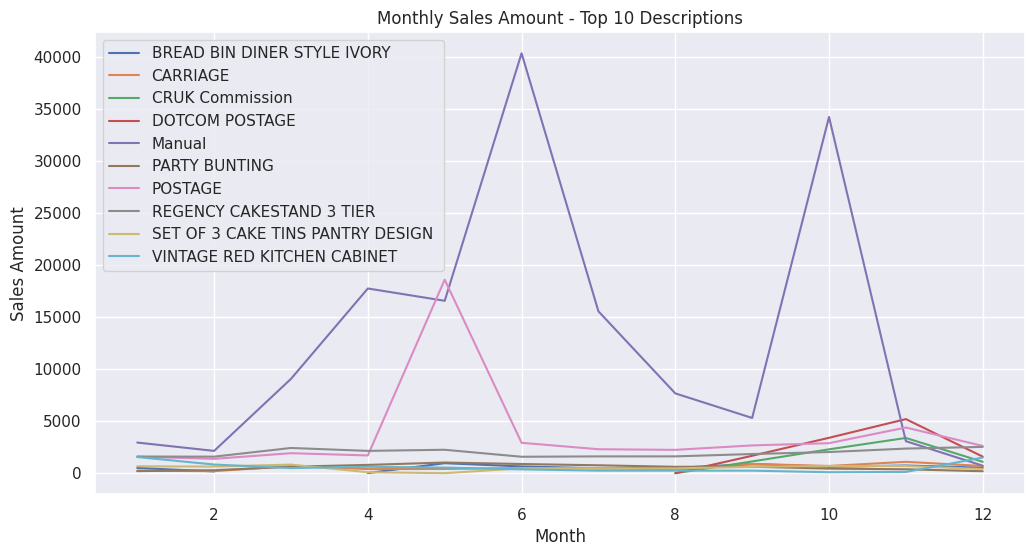

In [13]:
import matplotlib.pyplot as plt

# Créer un graphique linéaire
fig, ax = plt.subplots(figsize=(12, 6))
for description in monthly_sales_top_10.columns:
    ax.plot(monthly_sales_top_10.index, monthly_sales_top_10[description], label=description)

# Paramètres du graphique
ax.set_xlabel("Month")
ax.set_ylabel("Sales Amount")
ax.set_title("Monthly Sales Amount - Top 10 Descriptions")
ax.legend()

# Afficher le graphique
plt.show()

In [49]:
#Discovering what are the most and least popular products based on the quantity

qty=data.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)
qty.reset_index(inplace=True)
qty.head()

,StockCode,Description,Quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1,85099B,JUMBO BAG RED RETROSPOT,45066
2,84879,ASSORTED COLOUR BIRD ORNAMENT,35314
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
4,21212,PACK OF 72 RETROSPOT CAKE CASES,33409


Text(0, 0.5, 'Item')

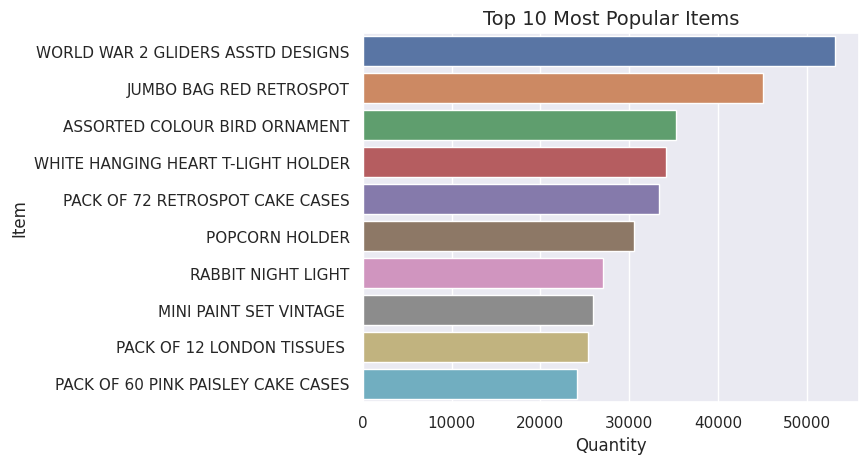

In [50]:
import seaborn as sns
sns.set()

sns.barplot(y='Description', x='Quantity', data=qty.head(10))
plt.title('Top 10 Most Popular Items', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

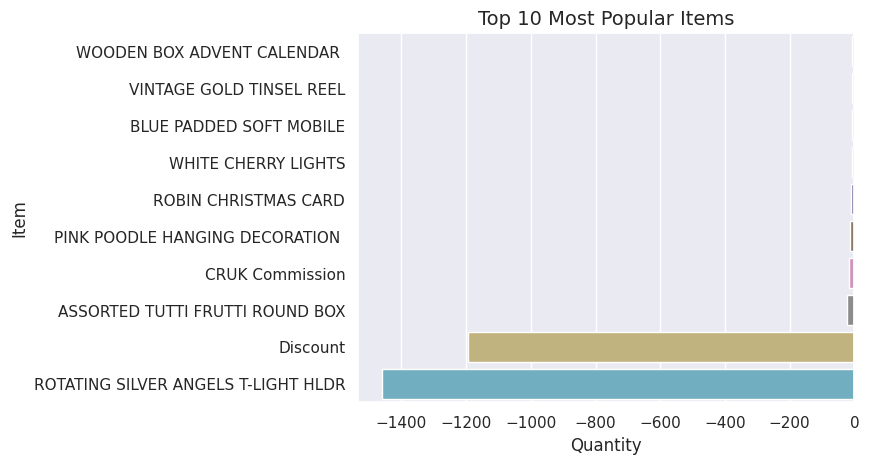

In [51]:
sns.barplot(y='Description', x='Quantity', data=qty.tail(10))
plt.title('Top 10 Most Popular Items', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

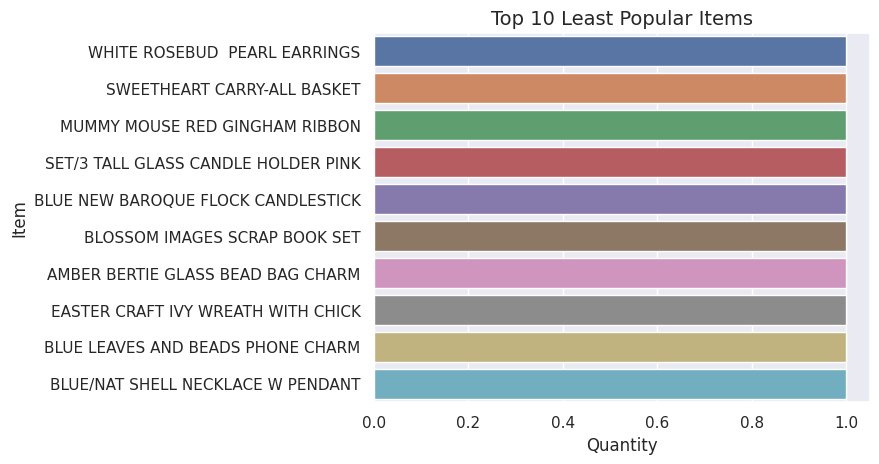

In [52]:
#The data above doesn't actually make sense since the quantity is less than 0. Therefore we will drop the dataframe which quantity <=0
qty=qty[qty['Quantity']>0]
sns.barplot(y='Description', x='Quantity', data=qty.tail(10))
plt.title('Top 10 Least Popular Items', fontsize=14)
plt.ylabel('Item')

In [53]:
bycountry=data.groupby('Country').sum()
bycountry.reset_index(inplace=True)
bycountry.sort_values(by='total_transaction', ascending=False).head()


<ipython-input-53-15b1978df859>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bycountry=data.groupby('Country').sum()


,Country,Quantity,UnitPrice,CustomerID,Month,total_transaction,Year
35,United Kingdom,4008533,1178277.264,5.626433e+09,2763955,6767873.394,727712122
23,Netherlands,200128,6492.550,3.419054e+07,15981,284661.540,4768009
10,EIRE,136329,38253.580,1.103917e+08,58035,250285.220,15051973
14,Germany,117448,37666.000,1.200751e+08,69223,221698.210,19093880
13,France,109848,42871.240,1.076489e+08,63698,196712.840,17074962


Text(0.5, 1.0, '5 Countries with Most Transaction')

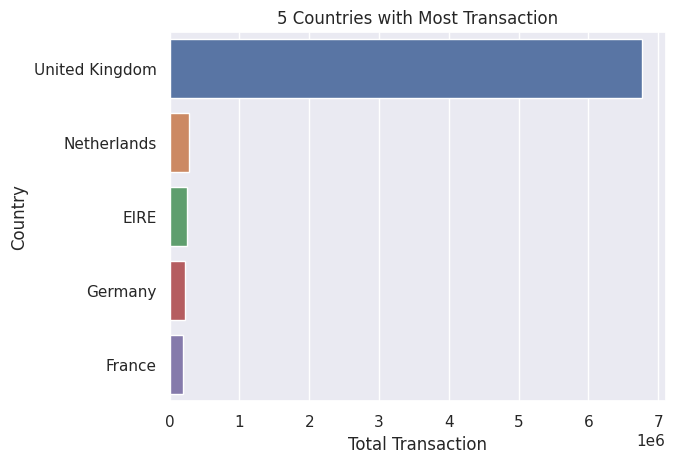

In [54]:
#sur figure
sns.barplot(x='total_transaction', y='Country', data=bycountry.sort_values(by='total_transaction', ascending=False).head())
plt.xlabel('Total Transaction')
plt.title('5 Countries with Most Transaction')

From the graph above we know that 5 top countries in terms of total transactions are UK, Netherlands, EIRE, Germany, and France

Text(0, 0.5, 'Item')

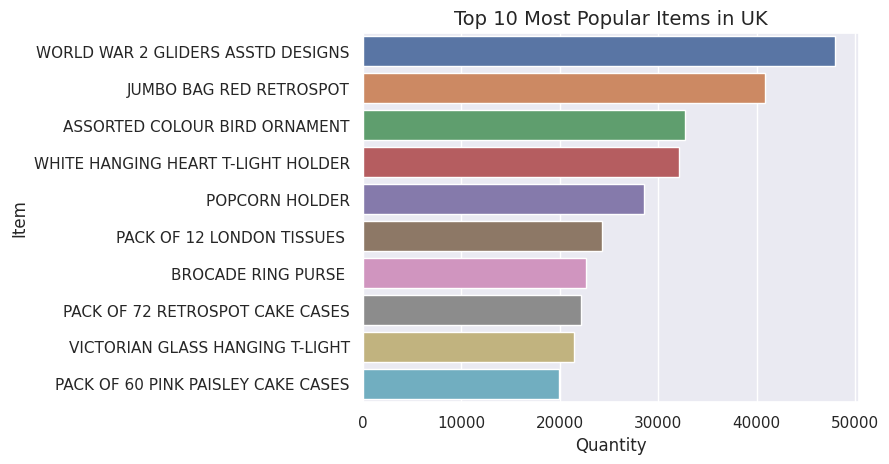

In [57]:
#Discovering most popular items of top countries
indexed=data.pivot_table(index=['Country','StockCode','Description'], values='Quantity', aggfunc='sum').reset_index()
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in UK', fontsize=14)
plt.ylabel('Item')


In [58]:
#Assume that customers who doesn't have any transactions data for the last 6 months are categorized as "Targets".
data.sort_values(by='InvoiceDate', ascending=False).head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,total_transaction,Year,Month_name
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,14.85,2011,Dec11
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,12,15.60,2011,Dec11
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,12,19.80,2011,Dec11
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,12,19.80,2011,Dec11
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,12,15.00,2011,Dec11


alors la dernière InvoiceDate est 2011-12-09
ce que signifie que les clients qui ne disposaient d'aucune transaction depuis le 09/06/2011 (6 mois jusqu'à la dernière date de facturation) sont classés dans la catégorie désabonnement.

Regroupez la trame de données par CustomerID, définissez la fonction d'agrégation sur max () et saisissez la date de la facture

In [64]:
client=data.groupby('CustomerID').max().sort_values(by='InvoiceDate', ascending=False)
client.loc[client['InvoiceDate'] < '2011-06-09', 'Target']='Yes'
client.loc[client['InvoiceDate'] >= '2011-06-09', 'Target']='No'
client


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,total_transaction,Year,Month_name,Target
CustomerID,,,,,,,,,,,,
12680.0,581587,POST,SPACEBOY LUNCH BOX,36,2011-12-09 12:50:00,18.00,France,12,36.00,2011,Sep11,No
13113.0,C570274,M,WICKER STAR,200,2011-12-09 12:49:00,12.75,United Kingdom,12,1700.00,2011,Oct11,No
15804.0,C578110,90205A,ZINC WILLIE WINKIE CANDLE STICK,48,2011-12-09 12:31:00,125.00,United Kingdom,12,250.00,2011,Sep11,No
13777.0,C579752,M,WHITE HANGING HEART T-LIGHT HOLDER,504,2011-12-09 12:25:00,12.75,United Kingdom,12,1383.12,2011,Sep11,No
17581.0,C568571,85231G,ZINC FOLKART SLEIGH BELLS,50,2011-12-09 12:21:00,195.00,United Kingdom,12,195.00,2011,Sep11,No
...,...,...,...,...,...,...,...,...,...,...,...,...
16583.0,536420,22969,WOODEN BOX OF DOMINOES,12,2010-12-01 12:03:00,4.95,United Kingdom,12,20.40,2010,Dec11,Yes
17908.0,536409,90210B,WHITE SKULL HOT WATER BOTTLE,28,2010-12-01 11:45:00,7.95,United Kingdom,12,19.05,2010,Dec11,Yes
12791.0,536403,POST,POSTAGE,96,2010-12-01 11:27:00,15.00,Netherlands,12,177.60,2010,Dec11,Yes


In [66]:
client[client['Target']=='Yes']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,total_transaction,Year,Month_name,Target
CustomerID,,,,,,,,,,,,
16832.0,556098,47590A,ROSE COTTAGE KEEPSAKE BOX,12,2011-06-08 15:36:00,16.95,United Kingdom,6,62.50,2011,May11,Yes
14622.0,556040,85099C,WOODEN PICTURE FRAME WHITE FINISH,24,2011-06-08 12:42:00,7.95,United Kingdom,6,23.60,2011,Jun11,Yes
16955.0,C538725,47590B,RIBBON REEL POLKADOTS,48,2011-06-08 10:36:00,16.95,United Kingdom,12,50.85,2011,Jun11,Yes
17409.0,555945,85014B,WHITE LOVEBIRD LANTERN,12,2011-06-08 10:36:00,14.95,United Kingdom,6,119.60,2011,Jun11,Yes
12383.0,C541586,POST,WHITE WOOD GARDEN PLANT LADDER,144,2011-06-08 08:02:00,18.00,Belgium,12,72.00,2011,Mar11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
16583.0,536420,22969,WOODEN BOX OF DOMINOES,12,2010-12-01 12:03:00,4.95,United Kingdom,12,20.40,2010,Dec11,Yes
17908.0,536409,90210B,WHITE SKULL HOT WATER BOTTLE,28,2010-12-01 11:45:00,7.95,United Kingdom,12,19.05,2010,Dec11,Yes
12791.0,536403,POST,POSTAGE,96,2010-12-01 11:27:00,15.00,Netherlands,12,177.60,2010,Dec11,Yes


In [67]:
analyse=client.reset_index().groupby('Target').count()
analyse.head()


,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,total_transaction,Year,Month_name
Target,,,,,,,,,,,,
No,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523
Yes,849,849,849,849,849,849,849,849,849,849,849,849


([<matplotlib.patches.Wedge at 0x7f353dfc9210>,
 [Text(-0.9015706645541274, 0.6302145165064267, 'Actif'),
  Text(0.9015706350516557, -0.630214558711995, 'Target')],
 [Text(-0.491765817029524, 0.3437533726398691, '81%'),
  Text(0.49176580093726663, -0.34375339566108815, '19%')])

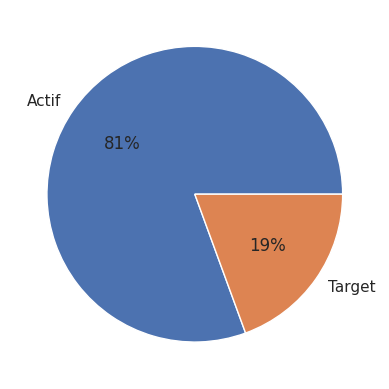

In [68]:
import matplotlib.pyplot as plt
plt.pie(analyse['CustomerID'], labels=['Actif', 'Target'], autopct='%1.0f%%')
